In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instalación de paquetes necesarios
!pip3 install pandas==1.3.1
!pip3 install numpy==1.21.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 11.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 10.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [ ]:
# Importación de paquetes
!pip3 install pickle5
import pickle5 as pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 14.2 MB/s 


In [ ]:
# Importación de paquetes
import pandas as pd
import numpy as np

In [ ]:
# Acceso a los trabajos de investigación y datos 
with open('/content/drive/MyDrive/BASE_CONOCIMIENTO/metadata_50000.pickle', 'rb') as f:
  df_metadata = pickle.load(f)
with open('/content/drive/MyDrive/BASE_CONOCIMIENTO/json_pdf_50000.pickle', 'rb') as f:
  df_pdf = pickle.load(f)
with open('/content/drive/MyDrive/BASE_CONOCIMIENTO/json_pmc_50000.pickle', 'rb') as f:
  df_pmc = pickle.load(f)

Muestreo y almacenamiento del conjunto de datos del curso


In [ ]:
# Se una los datos de metadata_sample, json_pdf_sample y json_pmc_sample mediante las columnas: sha y paper_id
# con el fin de completar los campos imcompletos y borra la primera columna de los campos
df_merged = pd.merge(df_metadata,df_pdf,left_on='sha',right_on='paper_id',how='left').drop('paper_id',axis=1)

In [ ]:
df_merged.head(1)
# abstract_x es el resumen de los metadatos y abstract_y es el resumen de json_pdf

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract_x,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_y,body_text
0,yskxbzer,5b33034f7b37a76557b4d2db72be64720e73ec15,PMC,Is an infectious trigger always required for p...,10.1002/pbc.27344,PMC7168068,30070073,no-cc,"In this report, we evaluate the hypothesis tha...",2018-08-01,...,Pediatr Blood Cancer,NaN,NaN,NaN,document_parses/pdf_json/5b33034f7b37a76557b4d...,document_parses/pmc_json/PMC7168068.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,NaN,NaN


In [ ]:
# Combinación de los datos json_pmc con los datos unidos
df_merged = pd.merge(df_merged,df_pmc,left_on='pmcid',right_on='paper_id',how='left').drop('paper_id',axis=1)
df_merged.shape

(50000, 22)

Limpieza y preprocesamiento de datos

In [ ]:
# Información de las dimensiones de la matriz donde se almacenan los documentos
df_merged[df_merged.abstract_x != df_merged.abstract_y].shape

(50000, 22)

In [ ]:
# Verificación de la columna abstract de metadatos para ver si existen valores nulos
df_merged.abstract_x.isnull().sum(),(df_merged.abstract_x == '').sum()

(6416, 0)

In [ ]:
# Verificación del abstract de pdf_json para ver si existen valores nulos
df_merged.abstract_y.isnull().sum(),(df_merged.abstract_y == '').sum()

(50000, 0)

Dado que el abstract_x de los metadatos es más fiable, lo utilizaremos pero sólo lo rellenaremos con el texto abstract_y, cuando el valor de abstract_x sea nulo


In [ ]:
# Convierte todas las columnas en cadenas y luego reemplazamos los valores abstract_y 
df_merged["abstract_y"] = df_merged["abstract_y"].astype(str) 
df_merged['abstract_y'] = np.where(df_merged['abstract_y'].map(len) > 50, df_merged['abstract_y'], "na")

In [ ]:
# Comprobación si los documentos tienen abstract
df_merged[df_merged['abstract_y'].apply(lambda x: len(str(x)) <= 10)]

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract_x,publish_time,...,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_y,body_text_x,body_text_y
0,yskxbzer,5b33034f7b37a76557b4d2db72be64720e73ec15,PMC,Is an infectious trigger always required for p...,10.1002/pbc.27344,PMC7168068,30070073,no-cc,"In this report, we evaluate the hypothesis tha...",2018-08-01,...,NaN,NaN,NaN,document_parses/pdf_json/5b33034f7b37a76557b4d...,document_parses/pmc_json/PMC7168068.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,na,NaN,Hemophagocytic lymphohistiocytosis (HLH) is a ...
1,7gp82nrd,5d6362d3f64ce969e40ba76226a21f6927d586d0,Medline; PMC,A diagnostic testing for people with appendici...,10.1007/s11042-022-11939-8,PMC8785023,35095329,no-cc,Appendicitis is a common disease that occurs p...,2022-01-24,...,NaN,NaN,NaN,document_parses/pdf_json/5d6362d3f64ce969e40ba...,document_parses/pmc_json/PMC8785023.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35095329/;...,246276378.0,na,NaN,Appendicitis is an infection of the appendix [...
2,dopbfxz4,250c64fdfd47d83e3f38f20e216ccecbd98e6b08,Medline; PMC,Potent Neutralization of SARS-CoV-2 by Hetero-...,10.1128/jvi.02438-20,PMC8139655,33658349,cc-by,Cellular entry of SARS-CoV-2 requires the bind...,2021-04-26,...,NaN,NaN,NaN,document_parses/pdf_json/250c64fdfd47d83e3f38f...,document_parses/pmc_json/PMC8139655.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33658349/;...,232113365.0,na,NaN,Coronavirus disease 2019 (COVID-19) caused by ...
3,1jzsci7a,64a525555bee106a7423b92f685020b0e338561d,Elsevier; PMC,Chapter 542 Hepatitis A Virus Picornain 3C,10.1016/b978-0-12-382219-2.00540-8,PMC7149673,NaN,els-covid,The third edition of the Handbook of Proteolyt...,2013-12-31,...,NaN,NaN,NaN,document_parses/pdf_json/64a525555bee106a7423b...,NaN,https://www.sciencedirect.com/science/article/...,88822282.0,na,NaN,NaN
4,f9q86tw7,f07fbe58ac649450ba759225e97dffbf00b48e36,Medline; PMC,School Nursing in a Pandemic: Striving for Exc...,10.1177/1942602x211005166,PMC8047512,33847191,cc-by,When the COVID-19 (coronavirus disease 2019) p...,2021-04-13,...,NaN,NaN,NaN,document_parses/pdf_json/f07fbe58ac649450ba759...,document_parses/pmc_json/PMC8047512.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33847191/;...,233223031.0,na,NaN,SFPS is a Vaccines for Children (VFC) provider...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,71fub3qt,bf96de1e846e0cde4a82c3be6b9c6e8de41b4f97,Medline; PMC,Lessons from a successful public health respon...,10.1111/1753-6405.13077,PMC8013354,33522665,cc-by-nc-nd,NaN,2021-02-01,...,NaN,NaN,NaN,document_parses/pdf_json/bf96de1e846e0cde4a82c...,document_parses/pmc_json/PMC8013354.xml.json,https://doi.org/10.1111/1753-6405.13077; https...,231761872.0,na,NaN,"In April 2020, a HCW (hereafter ‘the case’), w..."
49996,d3o07fw7,eeaa65a25dfde55b096829214e4d3739d75c64cd,Elsevier; Medline; PMC,Love in the Time of COVID-19: Sexual Function ...,10.1016/j.jsxm.2020.06.006,PMC7342024,32653391,no-cc,BACKGROUND: The beginning of 2020 was characte...,2020-07-08,...,NaN,NaN,NaN,document_parses/pdf_json/eeaa65a25dfde55b09682...,document_parses/pmc_json/PMC7342024.xml.json,https://api.elsevier.com/content/article/pii/S...,220404840.0,na,NaN,The coronavirus-2019 (COVID-19) represents the...
49997,e61e6gc6,1b16ebadba4374aeff32f4b7876151531d0cd0f2,Medline; PMC; WHO,Network Analysis of Outpatients to Identify Pr...,10.3389/fmed.2021.685124,PMC8329357,34355004,cc-by,Background: Limited data exist on early predic...,2021-07-20,...,NaN,NaN,NaN,document_parses/pdf_json/1b16ebadba4374aeff32f...,document_parses/pmc_json/PMC8329357.xml.json,https://doi.org/10.3389/fmed.2021.685124; http...,236095506.0,na,NaN,"On January 12, 2020, several severe pneumonia ..."
49998,pnrwf8av,c74adad841f58b3c1434d3027611da71a78f2a48,Medline; PMC,Toxicological Aspects of Increased Use of Surf...,10.2478/aiht-2020-71-3470,PMC7968494,33074170,cc-by-nc-nd,Al

In [ ]:
# Sustituimos abstract_x (columna de metadatos) por abstract_y (pdf_json) valor donde abstract_x es null
df_merged.loc[df_merged.abstract_x.isnull() & (df_merged.abstract_y != 'na'),'abstract_x'] = df_merged[df_merged.abstract_x.isnull() & (df_merged.abstract_y != 'na')].abstract_y

In [ ]:
# Los valores nulos se han reducido que es lo que esperábamos, 6924 anteriormente
df_merged.abstract_x.isnull().sum()


6416

In [ ]:
# Eliminamos la columna pdf_json abstract y cambiamos el nombre de la columna metadata abstract
df_merged.rename(columns = {'abstract_x' : 'abstract'}, inplace = True)
df_merged.drop('abstract_y',axis=1,inplace = True)
df_merged.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id', 'body_text_x', 'body_text_y'],
      dtype='object')

In [ ]:
# Se suman los cuerpos de textos si son distintos de las carpetas pdf y pmc
(df_merged.body_text_x != df_merged.body_text_y).sum()

50000

In [ ]:
# Suma los textos que contengan el campo body_text nulo y los vacios
df_merged.body_text_x.isnull().sum(),(df_merged.body_text_y == '').sum()

(50000, 0)

In [ ]:
#  Suma los textos que contengan el campo body_text nulo
# Se espera esa cantidad porque hay menos documentos en json_pmc
df_merged.body_text_y.isnull().sum()

9934

In [ ]:
# Suma los textos que contengan el campo body_text nulo para body_text_x y body_text_y
df_merged.body_text_x.isnull().sum(),(df_merged.body_text_y.isnull()).sum()

(50000, 9934)

In [ ]:
# Hay ~13k filas en las que body_text_x es null pero body_text_y no es null# Hay ~13k filas en las que body_text_x es null pero body_text_y no es null
df_merged.loc[df_merged.body_text_x.isnull() & df_merged.body_text_y.notnull()]

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text_x,body_text_y
0,yskxbzer,5b33034f7b37a76557b4d2db72be64720e73ec15,PMC,Is an infectious trigger always required for p...,10.1002/pbc.27344,PMC7168068,30070073,no-cc,"In this report, we evaluate the hypothesis tha...",2018-08-01,...,Pediatr Blood Cancer,NaN,NaN,NaN,document_parses/pdf_json/5b33034f7b37a76557b4d...,document_parses/pmc_json/PMC7168068.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,NaN,Hemophagocytic lymphohistiocytosis (HLH) is a ...
1,7gp82nrd,5d6362d3f64ce969e40ba76226a21f6927d586d0,Medline; PMC,A diagnostic testing for people with appendici...,10.1007/s11042-022-11939-8,PMC8785023,35095329,no-cc,Appendicitis is a common disease that occurs p...,2022-01-24,...,Multimed Tools Appl,NaN,NaN,NaN,document_parses/pdf_json/5d6362d3f64ce969e40ba...,document_parses/pmc_json/PMC8785023.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35095329/;...,246276378.0,NaN,Appendicitis is an infection of the appendix [...
2,dopbfxz4,250c64fdfd47d83e3f38f20e216ccecbd98e6b08,Medline; PMC,Potent Neutralization of SARS-CoV-2 by Hetero-...,10.1128/jvi.02438-20,PMC8139655,33658349,cc-by,Cellular entry of SARS-CoV-2 requires the bind...,2021-04-26,...,J Virol,NaN,NaN,NaN,document_parses/pdf_json/250c64fdfd47d83e3f38f...,document_parses/pmc_json/PMC8139655.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33658349/;...,232113365.0,NaN,Coronavirus disease 2019 (COVID-19) caused by ...
4,f9q86tw7,f07fbe58ac649450ba759225e97dffbf00b48e36,Medline; PMC,School Nursing in a Pandemic: Striving for Exc...,10.1177/1942602x211005166,PMC8047512,33847191,cc-by,When the COVID-19 (coronavirus disease 2019) p...,2021-04-13,...,NASN Sch Nurse,NaN,NaN,NaN,document_parses/pdf_json/f07fbe58ac649450ba759...,document_parses/pmc_json/PMC8047512.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33847191/;...,233223031.0,NaN,SFPS is a Vaccines for Children (VFC) provider...
5,eqlcltk7,ab24aa831b3e9ab444faad74ff72f3425df1612c,Medline; PMC,Weaning management of newly received beef calv...,10.2527/jas.2011-4077,PMC7110029,22648754,no-cc,Exposure to animals persistently infected (PI)...,2012-06-03,...,J Anim Sci,NaN,NaN,NaN,document_parses/pdf_json/ab24aa831b3e9ab444faa...,document_parses/pmc_json/PMC7110029.xml.json,https://doi.org/10.2527/jas.2011-4077; https:/...,890306.0,NaN,Bovine respiratory disease (BRD) is a multifac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,u67euiat,a6bdc2f381253edbbde62e906e727e2e2af6e35f; e9b5...,Elsevier; Medline; PMC,Neurological associations of COVID-19,10.1016/s1474-4422(20)30221-0,PMC7332267,32622375,no-cc,"BACKGROUND: The COVID-19 pandemic, caused by s...",2020-07-02,...,Lancet Neurol,NaN,NaN,NaN,document_parses/pdf_json/a6bdc2f381253edbbde62...,document_parses/pmc_json/PMC7332267.xml.json,https://doi.org/10.1016/s1474-4422(20)30221-0;...,220303061.0,NaN,"As of May 19, 2020, the COVID-19 pandemic, cau..."
49995,71fub3qt,bf96de1e846e0cde4a82c3be6b9c6e8de41b4f97,Medline; PMC,Lessons from a successful public health respon...,10.1111/1753-6405.13077,PMC8013354,33522665,cc-by-nc-nd,NaN,2021-02-01,...,Aust N Z J Public Health,NaN,NaN,NaN,document_parses/pdf_json/bf96de1e846e0cde4a82c...,document_parses/pmc_json/PMC8013354.xml.json,https://doi.org/10.1111/1753-6405.13077; https...,231761872.0,NaN,"In April 2020, a HCW (hereafter ‘the case’), w..."
49996,d3o07fw7,eeaa65a25dfde55b096829214e4d3739d75c64cd,Elsevier; Medline; PMC,Love in the Time of COVID-19: Sexual Function ...,10.1016/j.jsxm.2020.06.006,PMC7342024,32653391,no-cc,BACKGROUND: The beginning of 2020 was characte...,2020-07-08,...,J Sex Med,NaN,NaN,NaN,document_parses/pdf_json/eeaa65a25dfde55b09682...,document_parses/pmc_json/PMC7342024.xml.json,https://api.elsevier.com/content/article/pii/S...,220404840.0,NaN,The coronavirus-2019 (COVID-19) represents the

In [ ]:
# Confiamos en que el texto de la carpeta pmc sea de mayor calidad ya que contiene el texto completo. 
# Por lo tanto, vamos a reemplazar con body_text_x con body_text_y donde body_text_y existe
df_merged.loc[df_merged.body_text_y.notnull(),'body_text_x'] = df_merged.loc[df_merged.body_text_y.notnull(), 'body_text_y']

In [ ]:
# Eliminamos la columna pdf_pmc body text y cambiamos el nombre de la columna body textdf_merged.rename(columns = {'body_text_x' : 'body_text'}, inplace = True)
df_merged.rename(columns = {'body_text_x' : 'body_text'}, inplace = True)
df_merged.drop('body_text_y',axis=1,inplace = True)
df_merged.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id', 'body_text'],
      dtype='object')

In [ ]:
# Los valores nulos del cuerpo del texto (body_text) ahora han disminuido. 
df_merged.body_text.isnull().sum()

9934

In [ ]:
# Indica los campos que forman la columna
df_merged.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id', 'body_text'],
      dtype='object')

In [ ]:
# Selección de los campos que se van a utilizar y guardar
df_final = df_merged[['sha', 'title', 'abstract', 'publish_time', 'authors', 'url', 'body_text']]
df_finalfiltro = df_final

In [ ]:
df_final.head()

,sha,title,abstract,publish_time,authors,url,body_text
0,5b33034f7b37a76557b4d2db72be64720e73ec15,Is an infectious trigger always required for p...,"In this report, we evaluate the hypothesis tha...",2018-08-01,"Heeg, Maximilian; Ammann, Sandra; Klemann, Chr...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Hemophagocytic lymphohistiocytosis (HLH) is a ...
1,5d6362d3f64ce969e40ba76226a21f6927d586d0,A diagnostic testing for people with appendici...,Appendicitis is a common disease that occurs p...,2022-01-24,"Mijwil, Maad M.; Aggarwal, Karan",https://www.ncbi.nlm.nih.gov/pubmed/35095329/;...,Appendicitis is an infection of the appendix [...
2,250c64fdfd47d83e3f38f20e216ccecbd98e6b08,Potent Neutralization of SARS-CoV-2 by Hetero-...,Cellular entry of SARS-CoV-2 requires the bind...,2021-04-26,"Ma, Huan; Zeng, Weihong; Meng, Xiangzhi; Huang...",https://www.ncbi.nlm.nih.gov/pubmed/33658349/;...,Coronavirus disease 2019 (COVID-19) caused by ...
3,64a525555bee106a7423b92f685020b0e338561d,Chapter 542 Hepatitis A Virus Picornain 3C,The third edition of the Handbook of Proteolyt...,2013-12-31,"Yin, Jiang; Bergmann, Ernst M.",https://www.sciencedirect.com/science/article/...,NaN
4,f07fbe58ac649450ba759225e97dffbf00b48e36,School Nursing in a Pandemic: Striving for Exc...,When the COVID-19 (coronavirus disease 2019) p...,2021-04-13,"Barbee-Lee, Myrna; Seymour, Kimber; Hett, Anit...",https://www.ncbi.nlm.nih.gov/pubmed/33847191/;...,SFPS is a Vaccines for Children (VFC) provider...


FILTROS PARA SELECCIONAR DOCUMENTOS POR SU "title" Y "body_text" (QUE CONTIENE TODO EL DOCUMENTO)

In [ ]:
# Filtro para seleccionar los articulos en fechas determinadas
df_finalfiltro=df_finalfiltro.loc[df_finalfiltro["publish_time"].between('2020-03-01', '2022-12-31')] # 13855 docs
len(df_finalfiltro)

43756

In [ ]:
# Filtro para seleccionar los articulos por su titulo y cuerpo de texto.
# De aqui se filtraron por palabras claves
import numpy as np
mask = np.column_stack([df_finalfiltro['title'].astype(str).str.contains("surfaces remain" and "remain", na=False, case=False) for col in df_final])
filtro = df_finalfiltro.loc[mask.any(axis=1)]

In [ ]:
print("DOCS ENCONTRADOS: ", len(filtro))
print(filtro['url'])


DOCS ENCONTRADOS:  26
1608     https://doi.org/10.1007/s10803-021-05083-9; ht...
2453     https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
4299     https://doi.org/10.1111/1440-1630.12672; https...
9905     https://www.ncbi.nlm.nih.gov/pubmed/34625170/;...
10994    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...
13729    https://www.ncbi.nlm.nih.gov/pubmed/34041821/;...
14590    https://doi.org/10.1007/s00134-021-06402-5; ht...
14820    https://www.sciencedirect.com/science/article/...
18659    https://www.ncbi.nlm.nih.gov/pubmed/33748793/;...
18769    https://www.sciencedirect.com/science/article/...
21243    https://doi.org/10.1002/ams2.623; https://www....
24904    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...
25643    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...
25975    https://www.ncbi.nlm.nih.gov/pubmed/35407571/;...
29062    https://www.ncbi.nlm.nih.gov/pubmed/34704256/;...
30039    https://www.ncbi.nlm.nih.gov/pubmed/34982628/;...
31441    https://www.ncbi.nlm.nih.

In [ ]:
# Conteo de los campos nulos
df_final = df_final.dropna(axis=0,subset=['body_text', 'title'])
df_final.isnull().sum()

sha                0
title              0
abstract        4897
publish_time       0
authors          121
url                0
body_text          0
dtype: int64

In [ ]:
# Se muestran las longitudes de la dimensión de la matriz
# 49805 filas y 7 columnas
df_final.shape

(40066, 7)

# GUARDANDO DATOS FILTRADOS

In [ ]:
# Se guardan en formato CSV los datos que filtramos previamente
# Se creó un documento csv para cada busqueda filtrada y se unieron posteriormente
df_final.to_csv('/content/drive/MyDrive/BASE_CONOCIMIENTO/FINAL_CORD_DATA.csv', index=False)
df_finalfiltro.to_csv('Filtro_Surfaces.csv', index=False)

 # Análisis Exploratorio de Datos - Data Analysis (EDA) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalación de paquetes necesarios
!pip3 install pandas==1.3.1
!pip3 install numpy==1.21.1
!pip install seaborn==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 15.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 15.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 15.9 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
# Importación de paquetes
import seaborn as sns
sns.set_theme(style="darkgrid")
import calendar
import pandas as pd
import numpy as np

Revisión de los datos finales 

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/BASE_CONOCIMIENTO/Dataset_DatosFiltrados.csv')

In [ ]:
# Inspección de los datos
def inspect_data(data):
    return pd.DataFrame(
        {
            "Data Type": data.dtypes,
            "No of levels": data.apply(lambda x:len(x.unique()), axis=0),
            "levels": data.apply(lambda x:x.unique(), axis=0),
            "qtd_null": data.apply(lambda x: x.isnull().sum(), axis=0),
            "pct_null": data.apply(lambda x: x.isnull().sum() * 100 / len(x))
        }
    )

In [ ]:
inspect_data(df_final)

,Data Type,No of levels,levels,qtd_null,pct_null
sha,object,347,"[PMC8093949, PMC7595075, 9889b28b9f498c810cbf3...",0,0.000000
title,object,347,"[Post-COVID Syndrome: Incidence, Clinical Spec...",0,0.000000
abstract,object,329,[The clinical manifestations of COVID-19 range...,19,5.382436
publish_time,object,265,"[2021-05-04, 2020-10-06, 2021-01-20, 2020-09-2...",0,0.000000
authors,object,347,"[Pavli A, Theodoridou M, Maltezou HC., Alimoha...",0,0.000000
url,object,347,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,0,0.000000
body_text,object,348,[The clinical manifestations of COVID-19 range...,0,0.000000


In [ ]:
# Cambio de tipo de dato a datetime
df_final['publish_time'] = pd.to_datetime(df_final['publish_time'])

In [ ]:
# Cambio de tipo de dato a datetime
df_final['publish_year'] =  df_final['publish_time'].dt.year
df_final['publish_month'] =  df_final['publish_time'].dt.month
df_final['publish_day'] =  df_final['publish_time'].dt.day

In [ ]:
# Muestra el número de valores únicos para cada columna
df_final['publish_year'].nunique()

4

In [ ]:
# Muestra la fecha de publicación más antigua (menor)
df_final['publish_year'].min()

2019

In [ ]:
# Muestra la fecha de publicación más nueva (mayor)
df_final['publish_year'].max()

2022

[Text(0, 0.5, 'Cantidad'), Text(0.5, 0, 'Año de Publicación')]

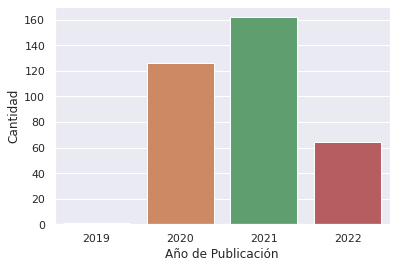

In [ ]:
# Nº de artículos publicados en los últimos años
publicaciones = sns.countplot(x="publish_year", data=df_final[df_final['publish_year'].isin([2019, 2020, 2021, 2022])])
publicaciones.set(xlabel="Año de Publicación", ylabel = "Cantidad")

[Text(0, 0.5, 'Cantidad'), Text(0.5, 0, 'Año 2020-22 - Meses de Publicación')]

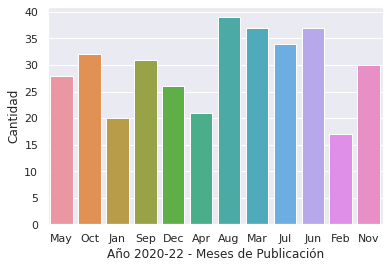

In [ ]:
#Distribución por meses de los trabajos publicados
distr_meses = sns.countplot(x="publish_month", data=df_final[df_final['publish_year'].isin([2020, 2021, 2022])])
distr_meses.set(xlabel="Año 2020-22 - Meses de Publicación", ylabel = "Cantidad")

In [ ]:
df_final['publish_month'] = df_final['publish_month'].apply(lambda x : calendar.month_abbr[x])

In [ ]:
# sns.countplot(x="publish_month", data=df_final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


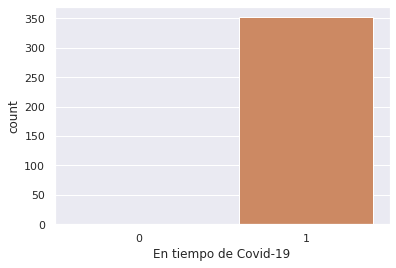

In [ ]:
#Comprobación del % de trabajos publicados en tiempos recientes frente a años anteriores
df_final['En tiempo de Covid-19'] = np.where(df_final['publish_year'].isin([2020,2021,2022]), 1, 0)
sns.countplot(df_final['En tiempo de Covid-19'])

**Revisión de nubes del palabras**

In [ ]:
# Instalación de paquetes necesarios
!pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importación de paquetes
from wordcloud import WordCloud, STOPWORDS 
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define una funcion para presentar una gráfica sin ejes.
def plot_word_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [ ]:
# Función para eliminar caracteres especiales y puntucaciones
def remove_special_charac_and_punctuations(text) :
# define el patrón a mantener
  pattern = r'[^a-zA-z0-9\'\s]' 
  txt = re.sub(pattern, '', text)
  txt = ''.join([c for c in txt if c not in string.punctuation])
  return  txt

In [ ]:
# Función para concatenar las sentencias
def concat_all_sentences(sents):
   all_tokens = ''
   for text in sents:
        tx = str(text).lower().strip()
        tx = " ".join(tx.split())
        all_tokens += tx + " "
   return all_tokens  

In [ ]:
# Limpieza de valores en el titulo
cleaned_titles = df_final.loc[df_final.title.notnull(), 'title'].apply(remove_special_charac_and_punctuations)

In [ ]:
# Limpieza de valores en el abstract
cleaned_abstracts = df_final.loc[df_final.abstract.notnull(), 'abstract'].apply(remove_special_charac_and_punctuations)

In [ ]:
# Aplica la función en los titulos para eliminar 
title_tokens = concat_all_sentences(cleaned_titles)

In [ ]:
# Aplica la función en los abstracts para eliminar 
abstract_tokens = concat_all_sentences(cleaned_abstracts)

In [ ]:
# title_tokens

In [ ]:
# abstract_tokens

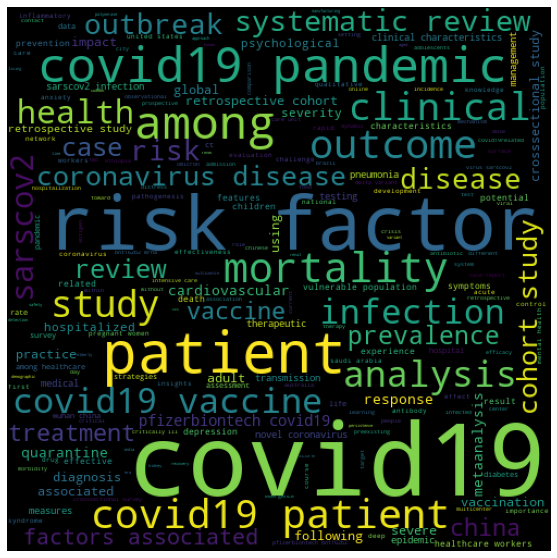

In [ ]:
# Observando la nube de palabras de los tokens del título
title_wordcloud = WordCloud(width = 500, height = 500,random_state=10).generate(title_tokens)
plot_word_cloud(title_wordcloud)

## Modelización de temas

In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_sm

2022-09-05 22:09:23.466148: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 19.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
abstracts = cleaned_abstracts.values.tolist()

In [ ]:
# simple_preprocess of genism: elimina los caracteres especiales, los números y los convierte en minúsculas
gensim.utils.simple_preprocess("12 happy today @# '' '\n'", deacc=True) 

['happy', 'today']

In [ ]:
# Construcción de tokens abstractos
def token_builder(sentences) :
   for sent in sentences:     
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  


In [ ]:
# Construcción de tokens abstractos usando token_builder
abstract_tokens = list(token_builder(abstracts))

In [ ]:
# Construcción de los modelos de bigramas y trigramas
bigram = gensim.models.Phrases(abstract_tokens, min_count=3, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[abstract_tokens], threshold=50)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk as nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Palabras para tener en cuenta e ignorar
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [ ]:
def process_docs(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    # nlp = spacy.load('en', disable=['parser', 'ner'])
    nlp = spacy.load("en_core_web_sm")
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # Eliminar las palabras de parada una vez más después de la lematización   
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out] 
    return texts_out

In [ ]:
abstracts_data = process_docs(abstract_tokens)

In [ ]:
# Creación de un Diccionario de datos
id2word = corpora.Dictionary(abstracts_data)

In [ ]:
print(id2word)

Dictionary(4529 unique tokens: ['chest', 'covid', 'damage', 'datum', 'especially']...)


In [ ]:
print(id2word.token2id)

{'chest': 0, 'covid': 1, 'damage': 2, 'datum': 3, 'especially': 4, 'evaluate': 5, 'far': 6, 'initial': 7, 'mild': 8, 'organ': 9, 'pain': 10, 'patient': 11, 'pneumonia': 12, 'range': 13, 'rate': 14, 'severe': 15, 'show': 16, 'specifically': 17, 'symptom': 18, 'vary': 19, 'consider': 20, 'detection': 21, 'disease': 22, 'dyspnea': 23, 'early': 24, 'fatigue': 25, 'key': 26, 'main': 27, 'people': 28, 'prevent': 29, 'role': 30, 'transmission': 31, 'additive': 32, 'badly': 33, 'bane': 34, 'case': 35, 'chain': 36, 'club': 37, 'community': 38, 'country': 39, 'cure': 40, 'desire': 41, 'development': 42, 'device': 43, 'discuss': 44, 'emerge': 45, 'emergence': 46, 'essential': 47, 'global': 48, 'great': 49, 'hit': 50, 'human': 51, 'impact': 52, 'increase': 53, 'initially': 54, 'large': 55, 'lead': 56, 'manufacturing': 57, 'medical': 58, 'medication': 59, 'meeting': 60, 'mortality': 61, 'note': 62, 'number': 63, 'positive': 64, 'prescribed': 65, 'primary': 66, 'product': 67, 'race': 68, 'response':

In [ ]:
# Creación del Corpus: Término Frecuencia del documento
corpus = [id2word.doc2bow(text) for text in abstracts_data]

In [ ]:
# Construcción del modelo LDA 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
print(lda_model.print_topics())

[(0, '0.040*"covid" + 0.039*"patient" + 0.016*"risk_factor" + 0.014*"high" + 0.013*"mortality" + 0.013*"study" + 0.012*"associate" + 0.010*"include" + 0.009*"risk" + 0.009*"disease"'), (1, '0.016*"pandemic" + 0.010*"health" + 0.009*"covid" + 0.008*"depression" + 0.007*"measure" + 0.007*"anxiety" + 0.006*"risk" + 0.005*"increase" + 0.005*"change" + 0.005*"virus"')]


In [ ]:
import matplotlib.pyplot as plt

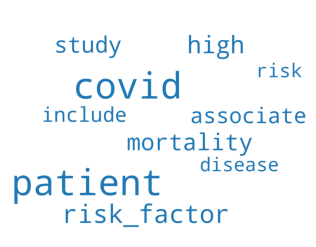

In [ ]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=2.0)

topics = lda_model.show_topics(formatted=False)

for i in range(0,1):
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(' ', fontdict=dict(size=12))
    plt.gca().axis('off')
    plt.show()

In [ ]:
topics = lda_model.show_topics(formatted=False)

In [ ]:
# Muestra los tópicos más empleados en las diferentes palabras dentro de los documentos
topics

[(0,
  [('covid', 0.039607156),
   ('patient', 0.039335616),
   ('risk_factor', 0.01579182),
   ('high', 0.014176327),
   ('mortality', 0.013392037),
   ('study', 0.01253209),
   ('associate', 0.011501094),
   ('include', 0.010069447),
   ('risk', 0.008848),
   ('disease', 0.008698272)]),
 (1,
  [('pandemic', 0.01641467),
   ('health', 0.0097799925),
   ('covid', 0.008639234),
   ('depression', 0.008031534),
   ('measure', 0.007480178),
   ('anxiety', 0.007140361),
   ('risk', 0.00618952),
   ('increase', 0.0053672385),
   ('change', 0.0050432542),
   ('virus', 0.004644297)])]